<a href="https://colab.research.google.com/github/m23csa522/SpeechUnderstandingQ2/blob/main/SpeechAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Download

In [11]:
!wget -O UrbanSound8K.zip https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz?download=1

--2025-02-02 10:47:03--  https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.48.194, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/1203745/files/UrbanSound8K.tar.gz [following]
--2025-02-02 10:47:03--  https://zenodo.org/records/1203745/files/UrbanSound8K.tar.gz
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 6023741708 (5.6G) [application/octet-stream]
Saving to: ‘UrbanSound8K.zip’

UrbanSound8K.zip    100%[===================>]   5.61G  22.5MB/s    in 4m 28s  

2025-02-02 10:51:31 (21.5 MB/s) - ‘UrbanSound8K.zip’ saved [6023741708/6023741708]



In [12]:
print('rahul')

rahul


In [13]:
import tarfile

tar_path = "/content/UrbanSound8K.zip"  # Change this path if using Google Drive

with tarfile.open(tar_path, "r:gz") as tar:
    tar.extractall(path="/content/")

print("Extraction complete!")


Extraction complete!


# Creating Dataset

In [21]:
import os
import math
import numpy as np
import pandas as pd
import re
import librosa

In [17]:
folds = os.listdir('/content/UrbanSound8K/audio')
folds = [i for i in folds if 'fold' in i]

In [18]:
folds

['fold3',
 'fold8',
 'fold6',
 'fold5',
 'fold7',
 'fold10',
 'fold2',
 'fold9',
 'fold4',
 'fold1']

In [22]:
filepath='/content/UrbanSound8K/audio/'
file_dict={}
for i in folds:
  temp_p=filepath+i+'/'
  wav_path=os.listdir(temp_p)
  wav_path=[temp_p+j for j in wav_path]
  file_dict[i]=wav_path


In [23]:
audio_ls=[]
for key in folds:
  temp_ls=file_dict[key]
  for path in temp_ls:
    #print(path)
    temp_dic={}
    if ".wav" in path:
      y,sr= librosa.load(path, sr=None)
      f=path.split('/')[-1]
      temp_dic['path']=path
      temp_dic['audio_vec']=y
      temp_dic['sr']=sr
      audio_ls.append(temp_dic)



In [24]:
audio_df=pd.DataFrame(audio_ls)

In [25]:
audio_df['audio_vec_len']=audio_df['audio_vec'].apply(lambda x : len(x))

In [26]:
audio_df['audio_vec_len'].value_counts()

audio_vec_len
176400    4523
192000    2120
384000     460
96000       83
64000       40
          ... 
107469       1
26017        1
157440       1
129640       1
50208        1
Name: count, Length: 1107, dtype: int64

In [27]:
meta_df=pd.read_csv('/content/UrbanSound8K/metadata/UrbanSound8K.csv')

In [28]:
meta_df

slice_file_name    fsID       start         end  salience  fold  \
0       100032-3-0-0.wav  100032    0.000000    0.317551         1     5   
1     100263-2-0-117.wav  100263   58.500000   62.500000         1     5   
2     100263-2-0-121.wav  100263   60.500000   64.500000         1     5   
3     100263-2-0-126.wav  100263   63.000000   67.000000         1     5   
4     100263-2-0-137.wav  100263   68.500000   72.500000         1     5   
...                  ...     ...         ...         ...       ...   ...   
8727     99812-1-2-0.wav   99812  159.522205  163.522205         2     7   
8728     99812-1-3-0.wav   99812  181.142431  183.284976         2     7   
8729     99812-1-4-0.wav   99812  242.691902  246.197885         2     7   
8730     99812-1-5-0.wav   99812  253.209850  255.741948         2     7   
8731     99812-1-6-0.wav   99812  332.289233  334.821332         2     7   

      classID             class  
0           3          dog_bark  
1           2  children_playing  
2           2  children_playing  
3           2  children_playing  
4           2  children_playing  
...       ...               ...  
8727        1          car_horn  
8728        1          car_horn  
8729        1          car_horn  
8730        1          car_horn  
8731        1          car_horn  

[8732 rows x 8 columns]

In [29]:
audio_df['slice_file_name	']=audio_df['path'].str.split('/').str[-1]
audio_df['folds	']=audio_df['path'].str.split('/').str[-2]

In [30]:
audio_df.rename(columns=({'slice_file_name\t':'slice_file_name', 'folds\t':'folds'}), inplace=True)

In [31]:
df=pd.merge(audio_df, meta_df, on='slice_file_name', how='left')

# Visualization

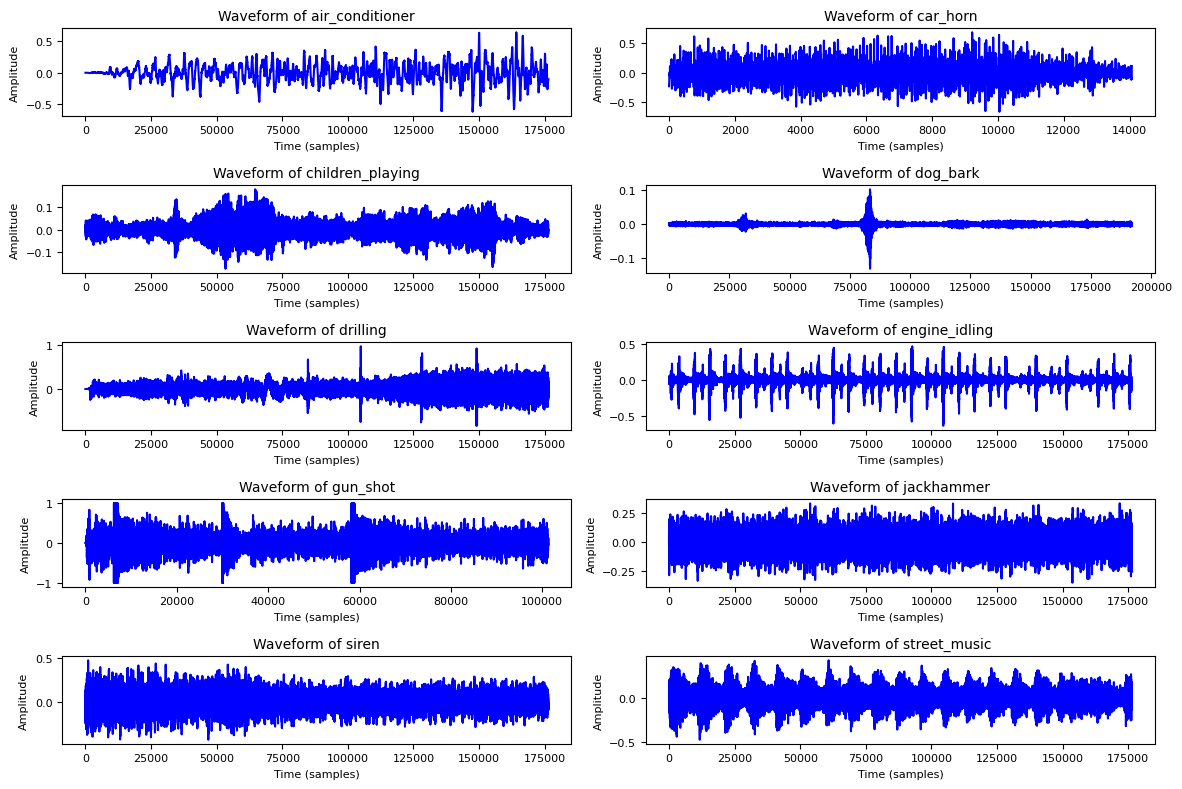

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Group by 'class' and select one example per class
unique_classes = df.groupby('class').first().reset_index()
unique_classes.rename(columns={'class': 'category'}, inplace=True)

num_classes = len(unique_classes)
cols = 2  # Set to 2 columns
rows = (num_classes // cols) + (num_classes % cols)  # Compute required rows

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))  # Adjust figure size
axes = axes.flatten()  # Flatten in case of single row

for i, row in enumerate(unique_classes.itertuples()):
    audio_vec = np.array(row.audio_vec)  # Convert to numpy array
    class_label = row.category

    axes[i].plot(audio_vec, color='b')
    axes[i].set_title(f"Waveform of {class_label}", fontsize=10)
    axes[i].set_xlabel("Time (samples)", fontsize=8)
    axes[i].set_ylabel("Amplitude", fontsize=8)
    axes[i].tick_params(axis='both', which='both', labelsize=8)

# Hide any unused subplots (if number of classes is odd)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Generating Spectogram

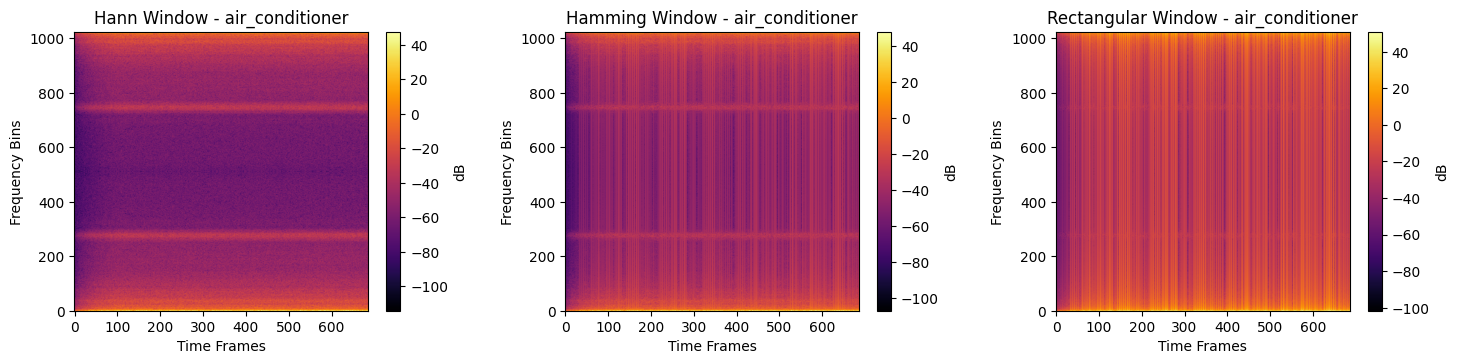

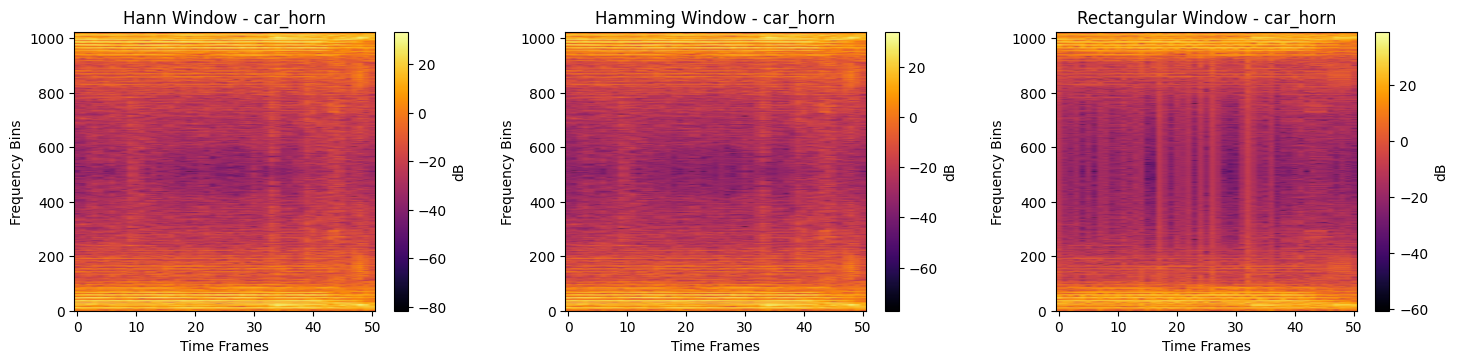

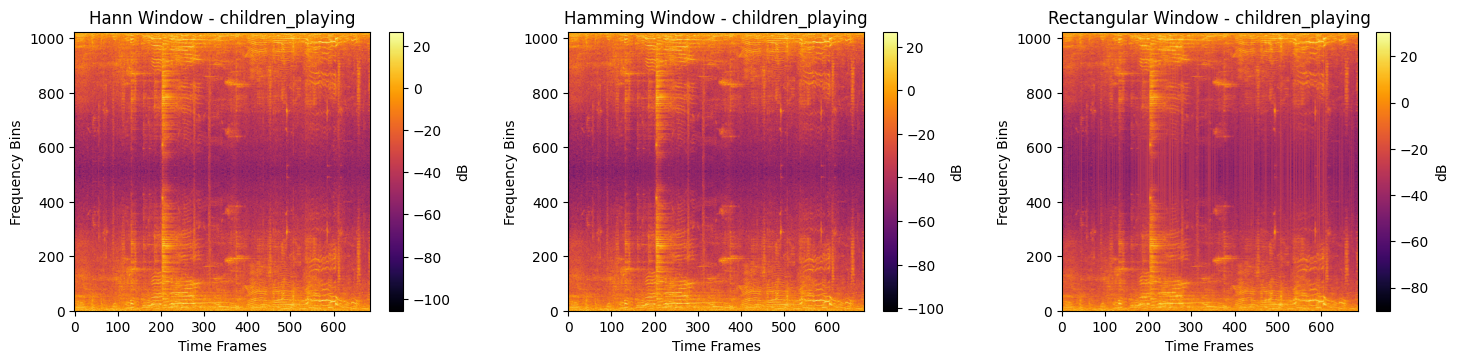

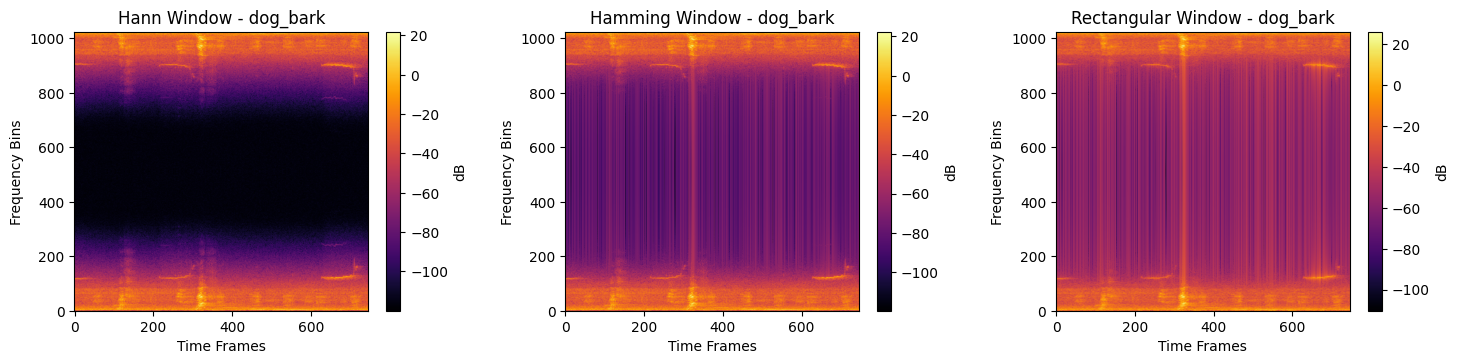

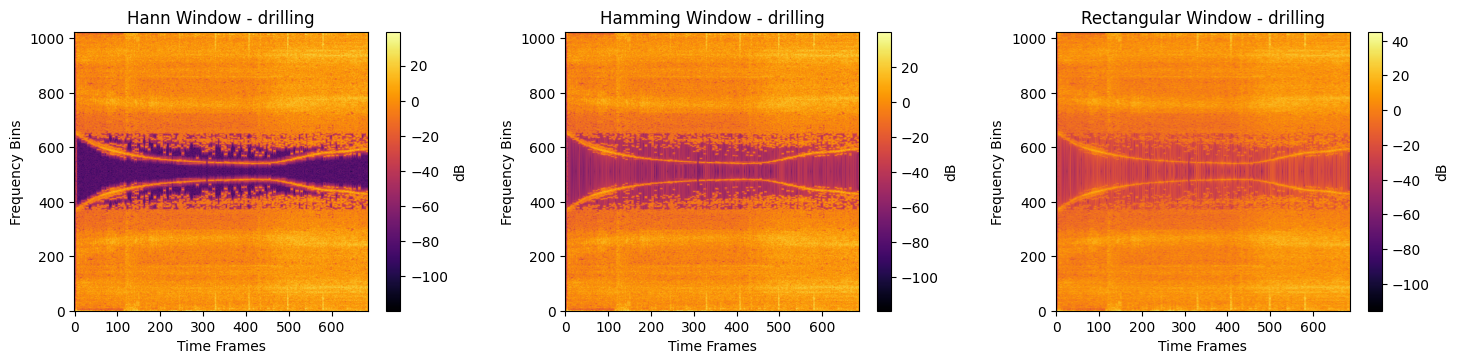

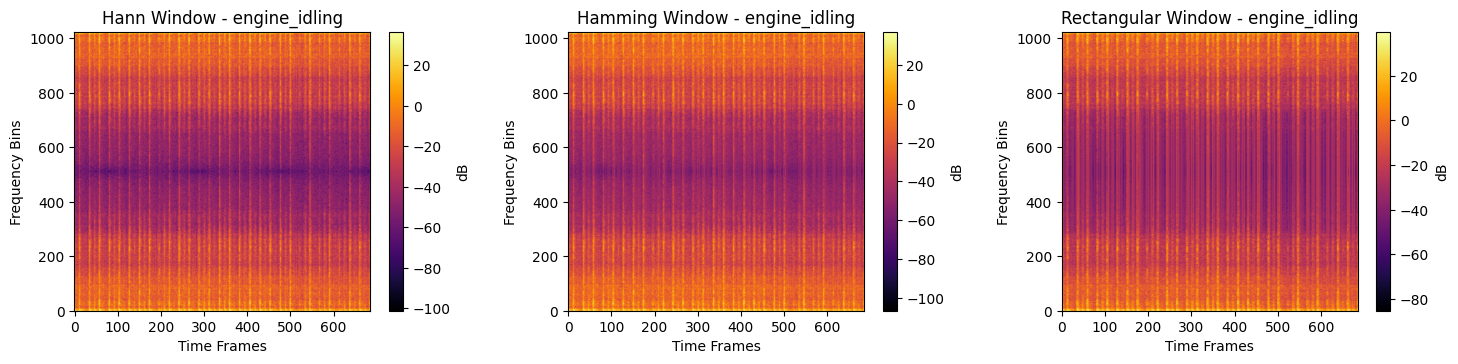

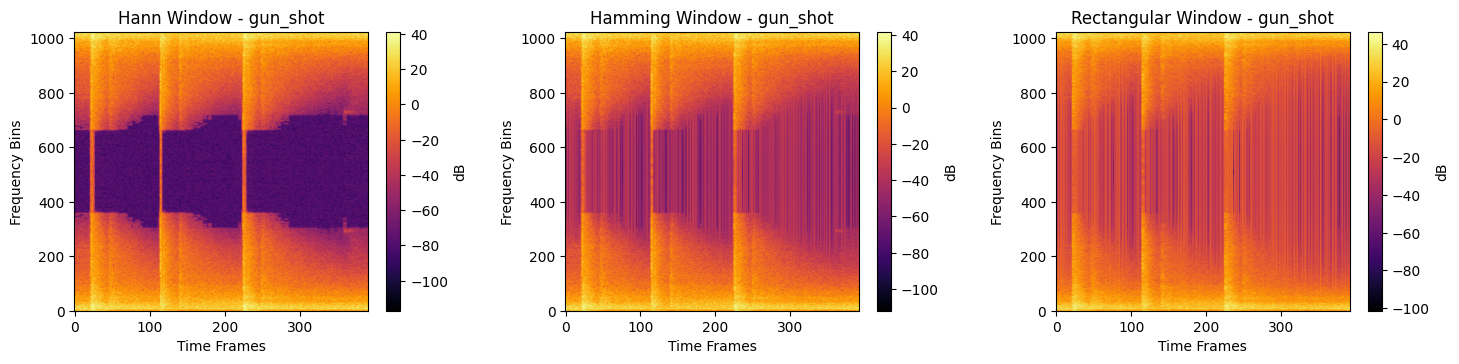

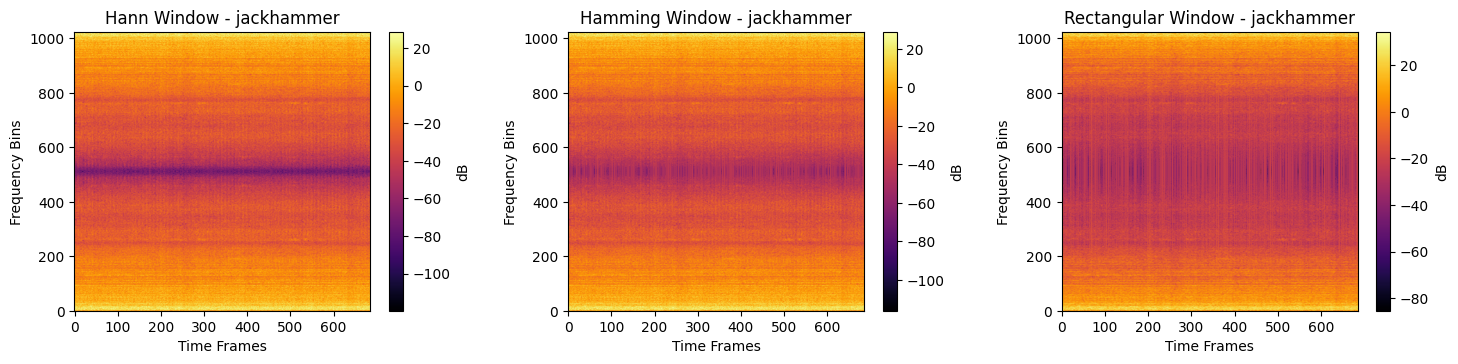

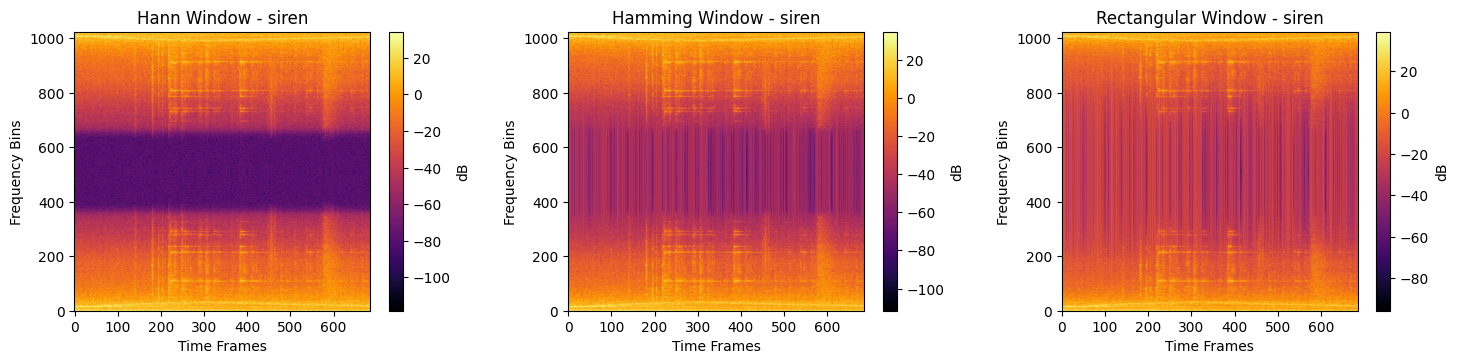

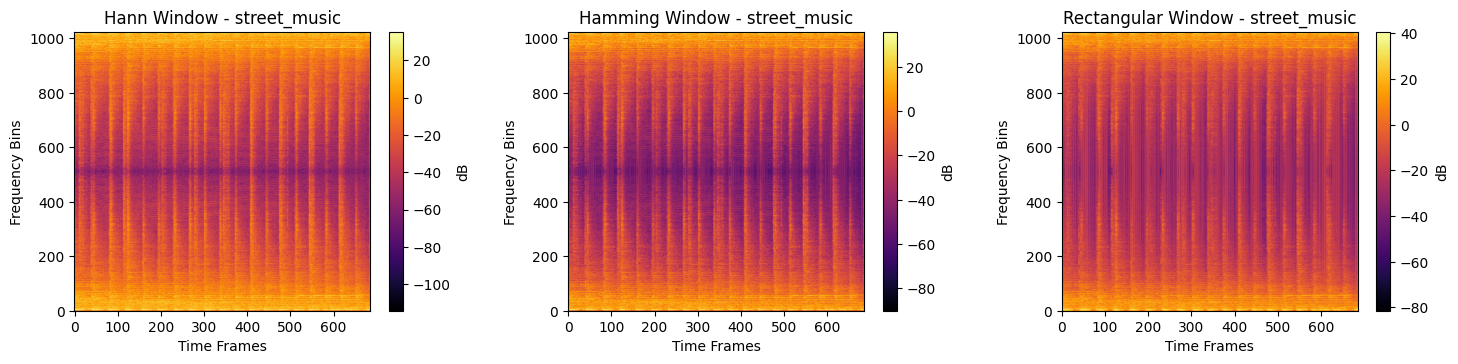

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Window functions
def hann_window(N):
    return 0.5 * (1 - np.cos(2 * np.pi * np.arange(N) / (N - 1)))

def hamming_window(N):
    return 0.54 - 0.46 * np.cos(2 * np.pi * np.arange(N) / (N - 1))

def rectangular_window(N):
    return np.ones(N)

# Compute STFT
def compute_stft(signal, window, hop_size):
    N = len(window)  # Window length
    spectrogram = []

    for i in range(0, len(signal) - N, hop_size):
        segment = signal[i:i+N] * window  # Apply window
        spectrum = np.fft.fft(segment)  # Compute FFT
        spectrogram.append(np.abs(spectrum))  # Store magnitude

    return np.array(spectrogram)

# Plot Spectrogram
def plot_spectrogram(stft_matrix, title):
    spectrogram_db = 20 * np.log10(np.abs(stft_matrix) + 1e-6)  # Convert to dB scale

    plt.imshow(spectrogram_db.T, aspect='auto', origin='lower', cmap='inferno')
    plt.colorbar(label="dB")
    plt.xlabel("Time Frames")
    plt.ylabel("Frequency Bins")
    plt.title(title)

# Processing dataset
hop_size = 256
window_length = 1024

unique_classes = df.groupby('class').first().reset_index()
unique_classes.rename(columns={'class': 'category'}, inplace=True)

# Creating spectrograms for each class
for i, row in enumerate(unique_classes.itertuples()):
    audio_vec = np.array(row.audio_vec)  # Convert to numpy array
    class_label = row.category

    # Generate STFT for each window
    hann_stft = compute_stft(audio_vec, hann_window(window_length), hop_size)
    hamming_stft = compute_stft(audio_vec, hamming_window(window_length), hop_size)
    rect_stft = compute_stft(audio_vec, rectangular_window(window_length), hop_size)

    # Plot all three spectrograms
    plt.figure(figsize=(15,4))

    plt.subplot(1, 3, 1)
    #plt.subplot(1, 3, i + 1)
    plot_spectrogram(hann_stft, f"Hann Window - {class_label}")
    plt.savefig(f"spectrogram_Hann Window_{class_label}.png", dpi=300, bbox_inches='tight')

    plt.subplot(1, 3, 2)
    plot_spectrogram(hamming_stft, f"Hamming Window - {class_label}")
    plt.savefig(f"spectrogram_Hamming Window_{class_label}.png", dpi=300, bbox_inches='tight')

    plt.subplot(1, 3, 3)
    plot_spectrogram(rect_stft, f"Rectangular Window - {class_label}")
    plt.savefig(f"spectrogram_Rectangular Window_{class_label}.png", dpi=300, bbox_inches='tight')


    plt.tight_layout(pad=2.0)
    plt.show()


# Extracting Features

In [97]:
def extract_features(audio_path, sr=22050, n_mfcc=40):
    """
    Extracts various audio features from an audio file.

    Parameters:
    - audio_path: Path to the audio file
    - sr: Sampling rate (default: 22050)
    - n_mfcc: Number of MFCCs to extract (default: 40)

    Returns:
    - features: A numpy array of extracted features
    """
    y, sr = librosa.load(audio_path, sr=sr)

    # Extract features
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr).T, axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr).T, axis=0)

    # Concatenate all features into a single array
    features = np.hstack([mfcc, chroma, mel, contrast, tonnetz])

    return features


In [107]:
df_features=pd.DataFrame()
for p in df['path']:
  feat=extract_features(p)
  df_features=pd.concat([df_features, pd.DataFrame(feat).T])

/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=880
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=440
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=220
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=110
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=531
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=266
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:101: Use

KeyboardInterrupt: 

In [109]:
df_features.shape

(1436, 193)

In [112]:
df_features.reset_index(drop=True, inplace=True)

In [115]:
df_features['class']=df['class']

In [116]:
df_features

0           1          2          3          4          5  \
0    -491.429474  137.175323 -68.236938  49.305367 -15.357916 -19.546459   
1    -173.236343   84.798225   3.135404  31.318619  12.610643  28.227461   
2     -93.371445  110.443352 -18.575270  16.783564 -20.415222  -3.378455   
3    -101.532784  126.300468 -23.501278   9.043165  -8.437256  19.218969   
4    -379.695099  127.050446  41.321751  25.316999  36.362743  27.215780   
...          ...         ...        ...        ...        ...        ...   
1431  -65.384583   72.488441  -0.462941  26.143250  18.758236  21.152727   
1432   17.905649   92.494774   2.686610  17.261042   0.443794   1.797228   
1433 -549.237366  184.037125  -9.887773 -13.943800  -2.777638   4.493824   
1434 -202.678543   63.871742 -42.232658 -26.450260 -18.613579   7.820196   
1435 -256.112457   98.025650  13.908062  -4.935660  -6.151947   8.808596   

              6          7          8          9  ...        184        185  \
0    -13.223672 -20.335558 -15.092782 -22.876245  ...  15.150543  23.302742   
1     31.372768  12.647837   4.954138  -0.306335  ...  13.866215  15.159810   
2    -20.171183  -3.571835 -23.438530  -4.478527  ...  14.590866  17.383903   
3      6.440098  15.271544   1.138196  11.285139  ...  15.070115  17.051873   
4     16.788717  14.831119  15.691971  19.547899  ...  17.019099  16.506248   
...         ...        ...        ...        ...  ...        ...        ...   
1431  15.959487  12.957035   9.591755  12.807383  ...  14.924161  15.248827   
1432  -4.424691  -1.097095  -8.104834  -2.435862  ...  14.039774  14.719736   
1433   1.794438   8.362149   6.728843   9.602699  ...  17.997871  15.358366   
1434 -37.289879  -0.854633 -35.347893   1.204844  ...  18.574416  18.126548   
1435  -4.159483   3.912648  -6.286028   2.814238  ...  15.465695  14.311511   

            186       187       188       189       190       191       192  \
0     52.620023  0.018173  0.007100  0.001016 -0.067304 -0.019051  0.015252   
1     44.159211  0.020214  0.016524 -0.000460 -0.059942 -0.012653 -0.016436   
2     51.742156 -0.010014  0.024553 -0.005046  0.001448 -0.048025 -0.019518   
3     51.526973  0.015784 -0.021334 -0.028233  0.080309  0.026994  0.011731   
4     39.606926 -0.035273  0.051286 -0.111909  0.062785  0.016212  0.019917   
...         ...       ...       ...       ...       ...       ...       ...   
1431  45.983204 -0.004273 -0.148339  0.274716 -0.173120 -0.047778 -0.111190   
1432  44.726885  0.004093 -0.028018 -0.048931 -0.039289  0.024536  0.063087   
1433  44.537589  0.034284 -0.003273  0.028945  0.005030 -0.002557 -0.004686   
1434  54.020449 -0.131636  0.018492  0.067475  0.062754 -0.001289  0.052778   
1435  46.543399 -0.003856  0.026318 -0.039133  0.006271  0.000763 -0.001200   

                class  
0            dog_bark  
1       engine_idling  
2          jackhammer  
3               siren  
4     air_conditioner  
...               ...  
1431    engine_idling  
1432     street_music  
1433            siren  
1434         dog_bark  
1435         dog_bark  

[1436 rows x 194 columns]

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


# Step 2: Separate features (X) and labels (y)
X = df_features.drop(columns=["class"])  # Features
y = df_features["class"]  # Categorical labels

# Step 3: Encode labels into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Converts class names into integers

# Step 4: Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Feature Scaling (optional but improves performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Define the classifiers to use
classifiers = [
    KNeighborsClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    MLPClassifier()
]

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall'])

# Loop through the classifiers
for clf in classifiers:
    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Evaluate the classifier on the test data
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")

    # Store the results in the DataFrame
    results = pd.concat([results, pd.DataFrame([{'Classifier': clf.__class__.__name__,
                              'Accuracy': accuracy,
                              'Precision': precision,
                              'Recall': recall}])], ignore_index=True)


# Sort the DataFrame by the Accuracy column in descending order
results.sort_values(by='Accuracy', ascending=False, inplace=True)

# show the DataFrame
results



<ipython-input-124-2ba1f1e514de>:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([{'Classifier': clf.__class__.__name__,
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classifier  Accuracy  Precision    Recall
5               MLPClassifier  0.930556   0.935644  0.933968
1      RandomForestClassifier  0.916667   0.908951  0.903582
3  GradientBoostingClassifier  0.916667   0.924157  0.921764
4               XGBClassifier  0.913194   0.923795  0.917508
0        KNeighborsClassifier  0.878472   0.909264  0.864383
2          AdaBoostClassifier  0.517361   0.583412  0.509353

from matplotlib import pyplot as plt
results['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results.groupby('Classifier').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results['Classifier'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results, x='Accuracy', y='Classifier', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results['Classifier'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results, x='Precision', y='Classifier', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results['Classifier'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results, x='Recall', y='Classifier', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Task 2B

In [127]:
song_path=["/content/"+song for song in os.listdir('/content') if ".mp3" in song]

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Create a 2x2 subplot for visualizing all four spectrograms
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid

for i, file_path in enumerate(song_path):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)

    # Compute STFT and convert to dB scale
    D = np.abs(librosa.stft(y))
    S_db = librosa.amplitude_to_db(D, ref=np.max)

    # Get subplot index
    row, col = divmod(i, 2)  # Converts index to 2D grid position

    # Plot spectrogram
    librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="log", cmap="inferno", ax=axes[row, col])
    axes[row, col].set_title(f"{file_path.split('/')[-1]}")
    axes[row, col].set_xlabel("Time (s)")
    axes[row, col].set_ylabel("Frequency (Hz)")

# Step 3: Adjust layout and display the spectrograms
plt.tight_layout()
output_path = "all_spectrograms.png"
plt.savefig(output_path)  # Saves all subplots together
plt.show()
